<a href="https://colab.research.google.com/github/shila121/projects/blob/main/credit_card_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Framing the Problem Statement
Here we are trying to predict which customers will buy the banking products or not. Target variable is 'Survived'

# 2.Data Analysis
we will try to understand the data by following ways

1.   hypothesis testing
2.   univariate/bivariate analysis
3.   missing data
4.   numerical data
5.   outliers
6.   categorical data





# Step 1:Hypothesis testing

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset
data = pd.read_csv('BankChurners.csv')
print(data.columns,data.shape)


print('data visualization')
print('*'*80)
print(data.head())
print(data.columns,len(data.columns))
print(data.shape)
print('*'*80)

# get the categorical columns from the data
catCols = data.select_dtypes('object').columns
print('categorical columns',catCols,len(catCols))
print('*'*80)


# get numerical columns from the data
numCols = data.select_dtypes('number').columns
print('numeric columns',numCols,len(numCols))
print('*'*80)

print(data['Attrition_Flag'].unique())

data['Attrition_Flag'] = data.Attrition_Flag.replace(to_replace=['Existing Customer', 'Attrited Customer'], value=[0, 1])
print(data['Attrition_Flag'].unique())

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object') (10127, 23)
data visualization
********************************************************************************
   CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Lev

In [2]:
# we will carry out z-test on the numerical columns to know their impact
from statsmodels.stats import weightstats as stests

significant_numCols,in_significant_numCols = [],[]

for i in numCols:
  p_val = stests.ztest(data[i],data.Attrition_Flag)
  p_val = p_val[1]
  print('column:',i,'p_val:',p_val)
  if p_val < 0.05:
    status = "Reject Null Hypothesis,Significant predictor"
    print('status',status)
    print('*'*80)
    significant_numCols.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictor'
    print('status',status)
    in_significant_numCols.append(i)
    print('*'*80)

print('significant numeric columns:',significant_numCols,len(significant_numCols))
print('in_significant numeric columns:',in_significant_numCols,len(in_significant_numCols))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


column: CLIENTNUM p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: Customer_Age p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: Dependent_count p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: Months_on_book p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: Total_Relationship_Count p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: Months_Inactive_12_mon p_val: 0.0
status Reject Null Hypothesis,Significant predictor
*******************************************************************

In [3]:
# wew will carry out chi-square test on categorical columns to know the significance

significant_catCols,in_significant_catCols = [],[]

from scipy.stats import chi2_contingency

for i in catCols:
  if i != 'Survived':
    stat,p_val,dof,ex = chi2_contingency(pd.crosstab(data[i],data.Attrition_Flag))
    print('column:',i,',p_val:',p_val)
    if p_val < 0.05:
      status = "Reject Null Hypothesis,Significant predictor"
      print('status',status)
      print('*'*80)
      significant_catCols.append(i)
    else:
      status = 'Accept Null Hypothesis,Insignificant predictor'
      print('status',status)
      in_significant_catCols.append(i)
      print('*'*80)

print('significant categorical columns:',significant_catCols,len(significant_catCols))
print('in_significant categorical columns:',in_significant_catCols,len(in_significant_catCols))

column: Attrition_Flag ,p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: Gender ,p_val: 0.00019635846717310307
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: Education_Level ,p_val: 0.05148913147336634
status Accept Null Hypothesis,Insignificant predictor
********************************************************************************
column: Marital_Status ,p_val: 0.10891263394840227
status Accept Null Hypothesis,Insignificant predictor
********************************************************************************
column: Income_Category ,p_val: 0.025002425704390617
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: Card_Category ,p_val: 0.5252382797994759
status Accept Null Hypothesis,Insignificant p

# Step 2:Univariate/Bivariate analysis

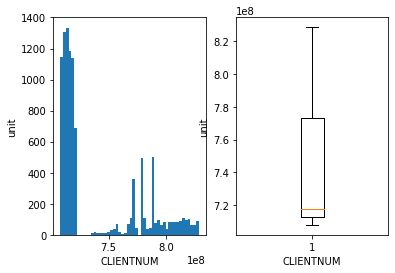

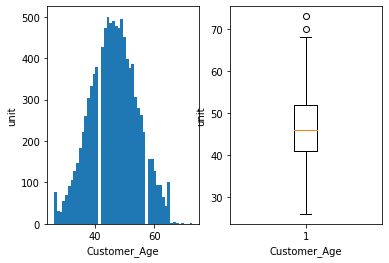

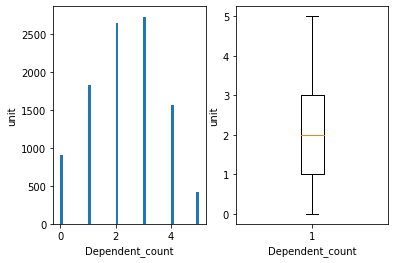

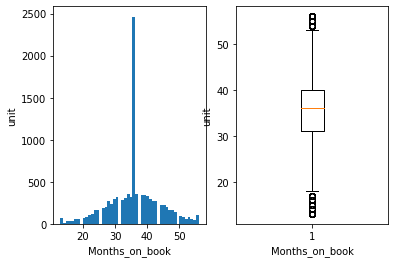

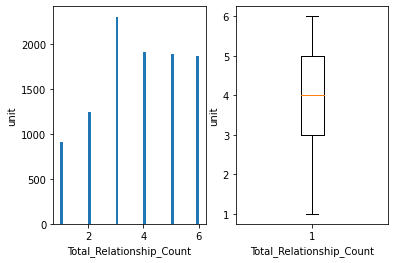

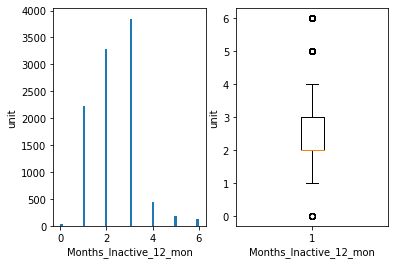

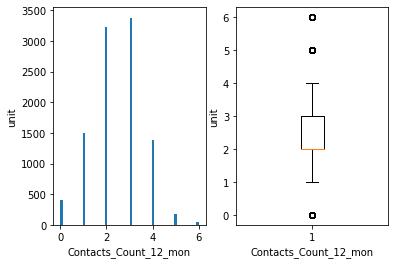

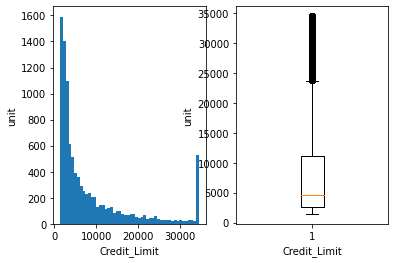

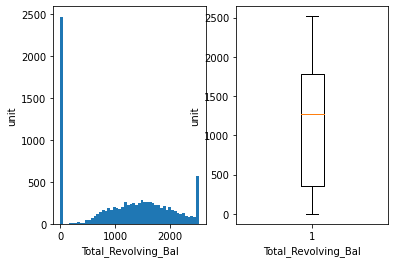

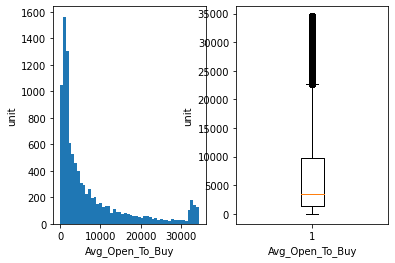

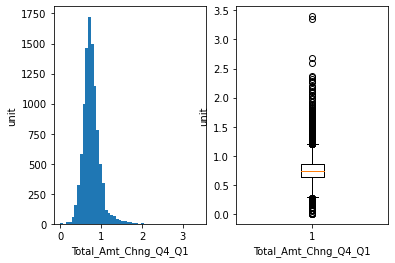

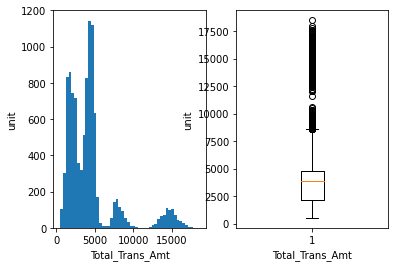

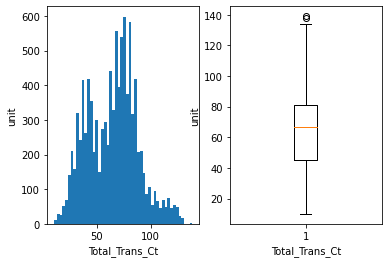

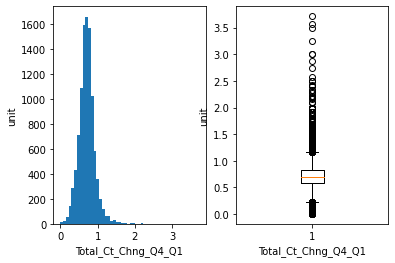

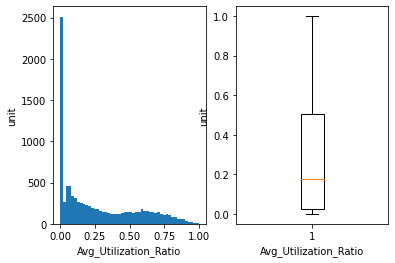

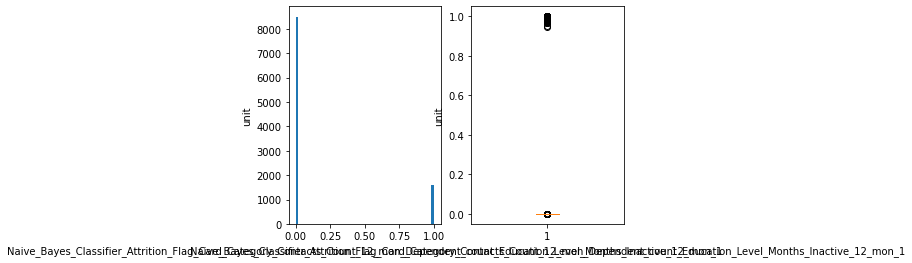

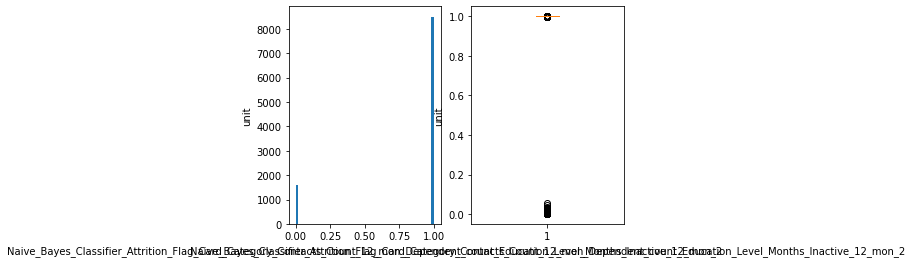

In [4]:
# univariate analysis of numeric columns with histogram and boxplot

for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins =50)
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.show()

In [5]:
# noted that outliers are present in the data

# univariate analysis of categorical columns with value counts

for i in catCols:
  print('column:',i)
  print(data[i].value_counts())
  print('*'*80)

column: Attrition_Flag
0    8500
1    1627
Name: Attrition_Flag, dtype: int64
********************************************************************************
column: Gender
F    5358
M    4769
Name: Gender, dtype: int64
********************************************************************************
column: Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
********************************************************************************
column: Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
********************************************************************************
column: Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int6

                                                    CLIENTNUM  ...  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM                                            1.000000  ...                                           0.046410                                                                                 
Attrition_Flag                                      -0.046430  ...                                          -0.999989                                                                                 
Customer_Age                                         0.007613  ...                                          -0.018189                                                                                 
Dependent_count                                      0.006772  ...                                          -0.019189                                                                                 
Month

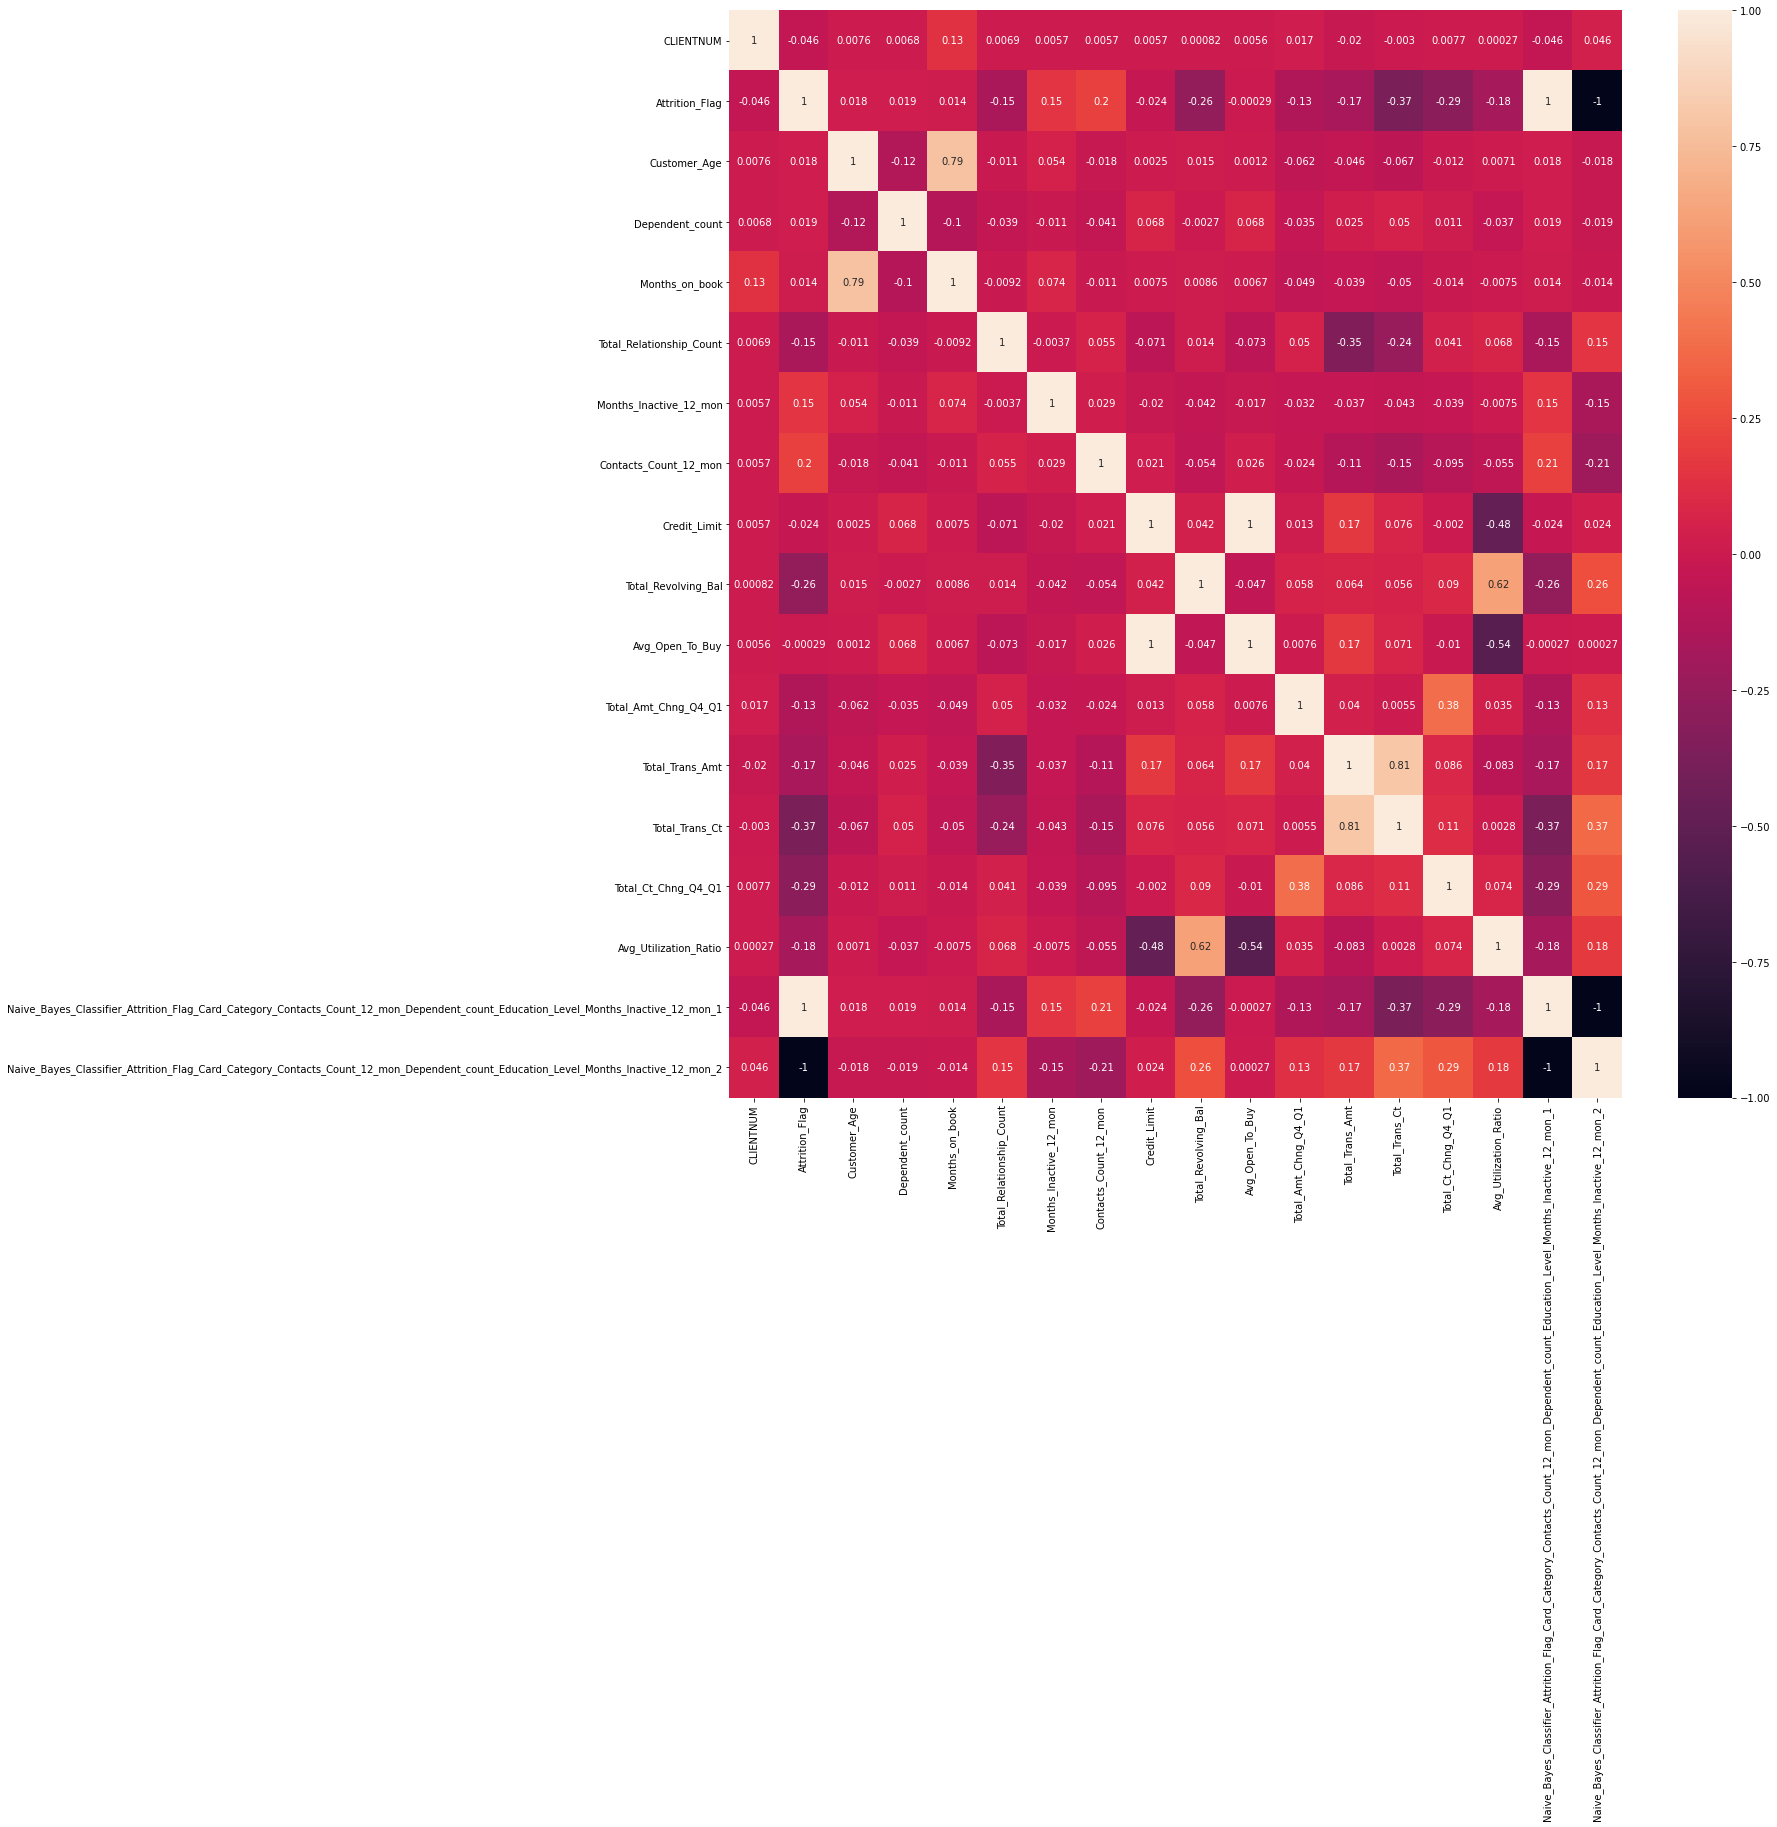

In [6]:
# Bi-variate analysis of numeric data by Co-relation matrix
import seaborn as sns
matrix = data.corr()
print(matrix)
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(matrix,annot = True)

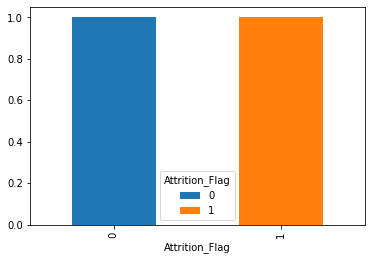

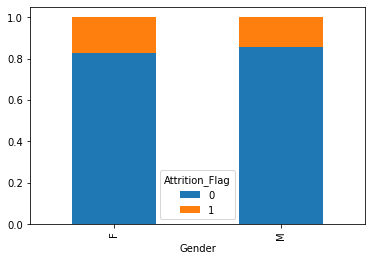

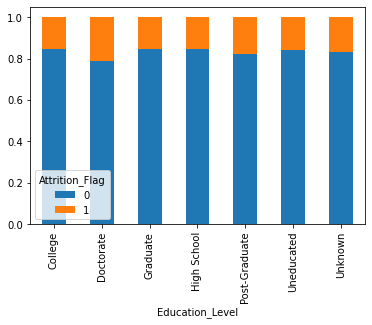

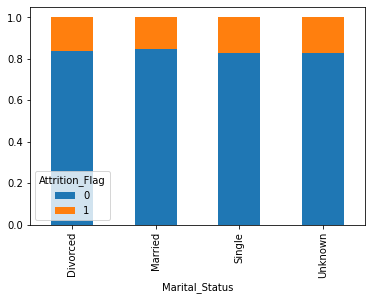

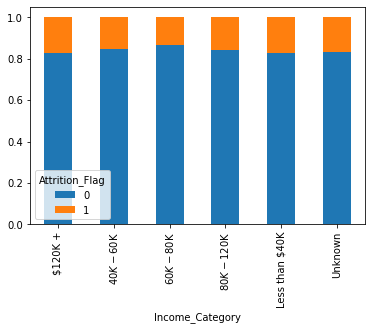

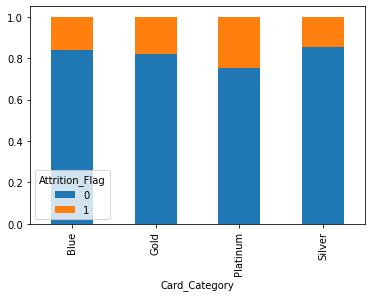

In [7]:
# Bi-variate analysis of categorical columns

for i in catCols:
  category = pd.crosstab(data[i],data['Attrition_Flag'])
  category.div(category.sum(1).astype(float),axis =0 ).plot(kind = 'bar',stacked = True)
  plt.show()

# Step 3:Missing data

In [8]:
# lets analyse if data contains any missing values

print(data.isnull().sum())
# no missing data

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

# Step 4:Numerical Data Analysis

In [9]:
print('numerical columns:',numCols,len(numCols))

# ->1. visualize the numerical columns
print(data[numCols].head())
print('-'*60)

# ->2.make a list of discrete numerical columns
discrete_numCols = [var for var in numCols if len(data[var].unique())<20]
print('discrete numerical columns:',discrete_numCols,len(discrete_numCols))
print('-'*60)

# ->3.visualize discrete numerical columns
print(data[discrete_numCols].head())
print('-'*60)

# ->4. make a list of continuous numerical columns
continuous_numCols =[ var for var in numCols if len(data[var].unique())>20]
print('continuous numerical columns:',continuous_numCols,len(continuous_numCols))
print('-'*60)

# ->5.visualize the continuous numerical columns
print(data[continuous_numCols].head())
print('-'*60)


numerical columns: Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object') 17
   CLIENTNUM  ...  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0  768805383  ...                                            0.99991                                                                                 
1  818770008  ...         

# Step 5:Outliers analysis

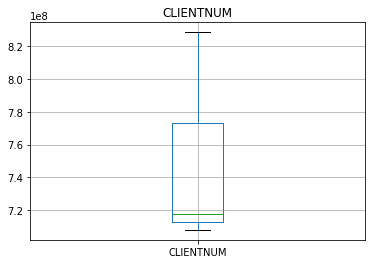

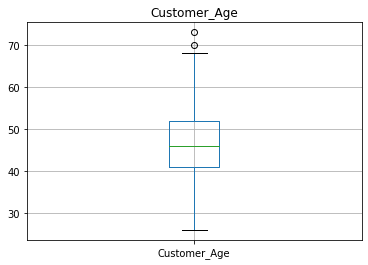

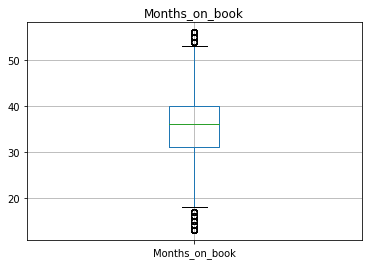

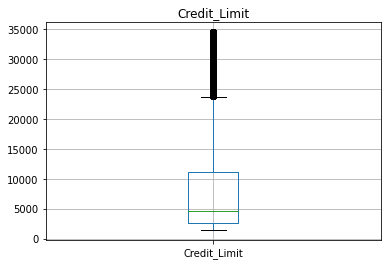

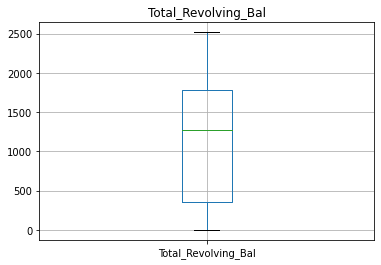

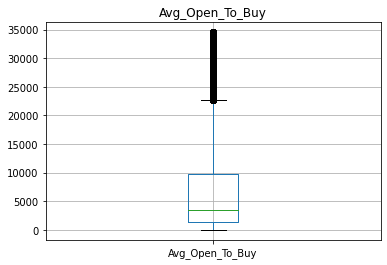

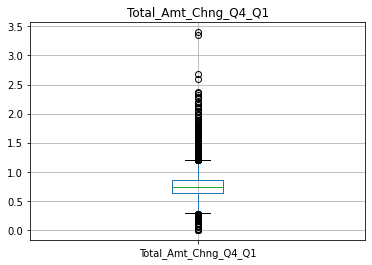

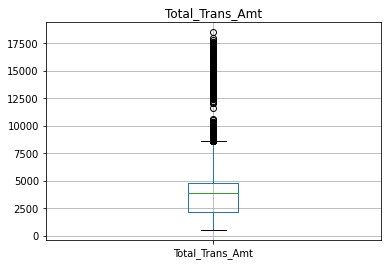

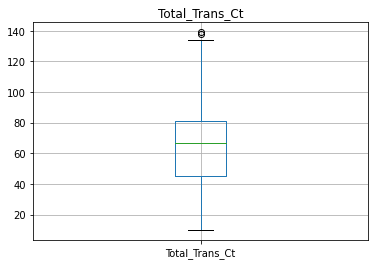

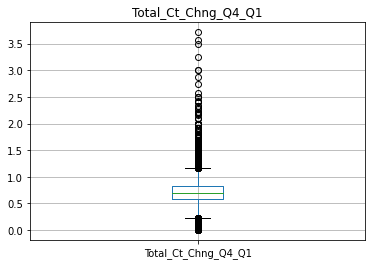

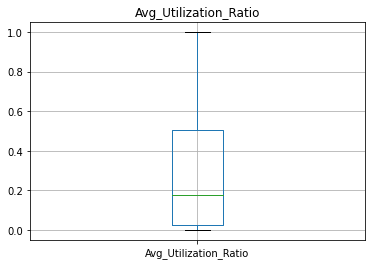

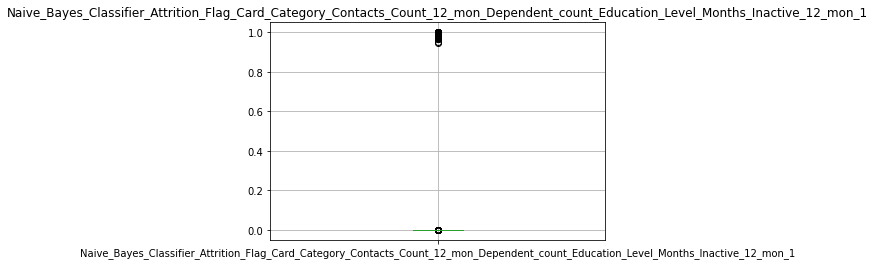

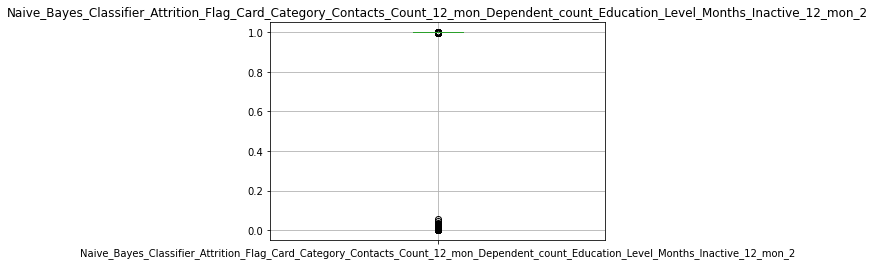

In [10]:
def find_outliers(df,var):
  df = df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.show()


for i in continuous_numCols:
  find_outliers(data,i)

# Step 6:Categorical data analysis

In [11]:
# ->1.visualize the categorical data
print('categorical columns:',catCols,len(catCols))
print('-'*60)
print(data[catCols].head())
print('-'*60)

# ->2.cardinality of the categorical data
print(data[catCols].nunique())
print('-'*60)

# ->3 analyse rare labels
def analyse_rare_vars(df,var,rare_percentage):
  df = df.copy()
  tmp = df.groupby(var)['Attrition_Flag'].count()/len(df)
  return tmp[tmp < rare_percentage]

for i in catCols:
  print(analyse_rare_vars(data,i,0.01)) #here we,consider rare percent as 1%
  print()


categorical columns: Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object') 6
------------------------------------------------------------
   Attrition_Flag Gender  ... Income_Category Card_Category
0               0      M  ...     $60K - $80K          Blue
1               0      F  ...  Less than $40K          Blue
2               0      M  ...    $80K - $120K          Blue
3               0      F  ...  Less than $40K          Blue
4               0      M  ...     $60K - $80K          Blue

[5 rows x 6 columns]
------------------------------------------------------------
Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64
------------------------------------------------------------
Series([], Name: Attrition_Flag, dtype: float64)

Series([], Name: Attrition_Flag, dtype: float64)

Series([], Name: Attrition_Flag, dt

# 3.Feature Engineering

Here,we will deal with all the problems like

1.   train_test split
2.   missing value treatment
3.   outlier treatment
4.   rare category treatment
5.   caterical data encoding
6.   feature scaling
7.   feature selection








In [12]:
# ->1. Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['Attrition_Flag'],random_state =0,test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8101, 23) (2026, 23) (8101,) (2026,)


In [13]:
# ->2. missing value treatmnet --> not required as no missing values


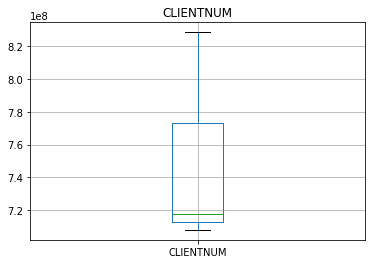

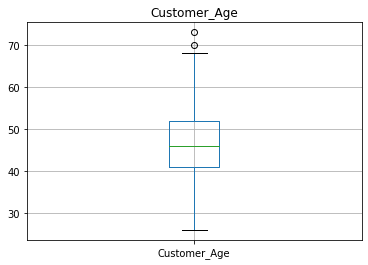

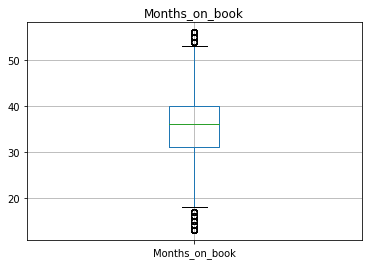

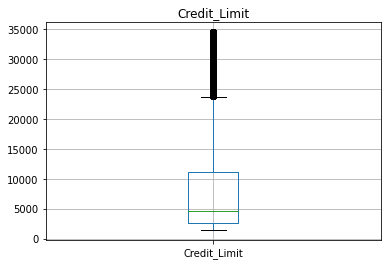

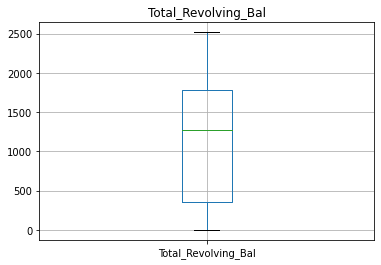

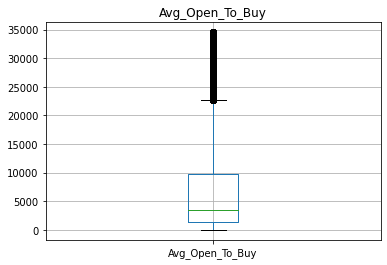

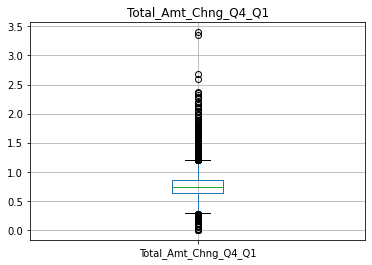

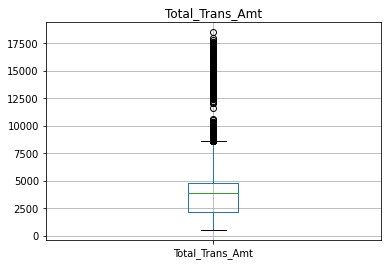

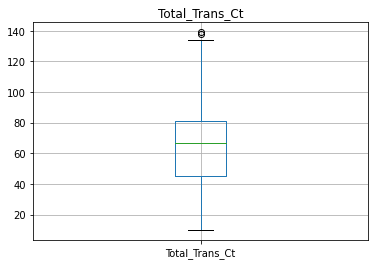

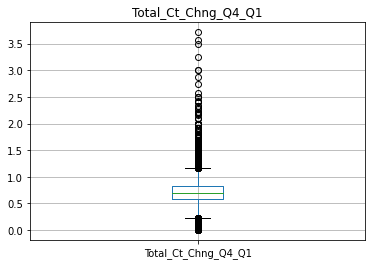

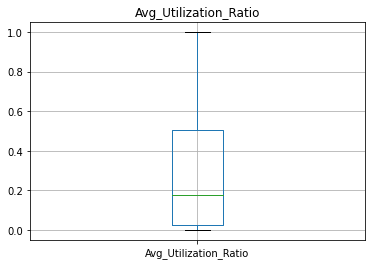

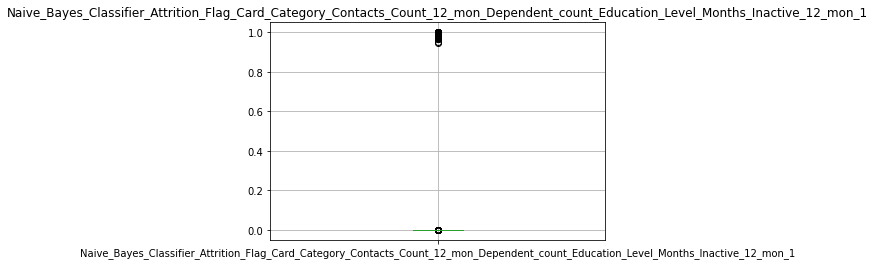

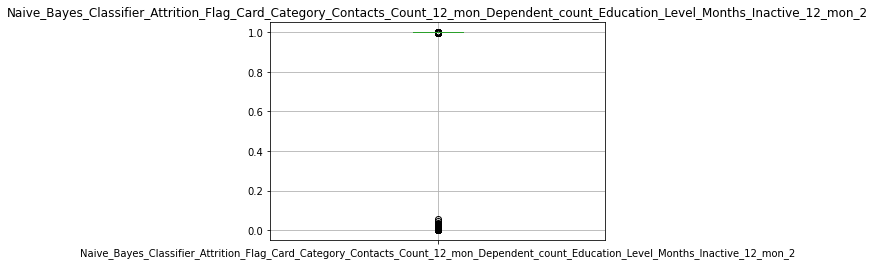

In [14]:
# ->step 3. handling outliers --> not required


for var in continuous_numCols:
  find_outliers(data,var)

In [15]:
# 4->handling rare labels

print('categorical columns:',catCols,len(catCols))

categorical columns: Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object') 6


In [16]:
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

def find_frequent_labels(df,var,rare_percent):
  df = df.copy()
  tmp = df.groupby(var)['Attrition_Flag'].count()/len(df)
  return tmp[tmp>rare_percent].index

print('categorical variables:',cat_vars,len(cat_vars))

for var in cat_vars:

  # find the frequent categories
  frequent_ls = find_frequent_labels(X_train,var,0.01)

  # replace rarecategorical columns with 'Rare' labels
  X_train[var] = np.where(X_train[var].isin(frequent_ls),X_train[var],'Rare')

  X_test[var] = np.where(X_test[var].isin(frequent_ls),X_test[var],'Rare')

categorical variables: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'] 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [17]:
# ->6.Encoding categorical variables

def replace_categories(train,test,var,target):

  ordered_labels = train.groupby([var])[target].mean().sort_values().index

  ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)

for var in cat_vars:
  replace_categories(X_train, X_test, var, 'Attrition_Flag')

print(X_train.shape,X_test.shape)
print(X_train.head())

(8101, 23) (2026, 23)
      CLIENTNUM  ...  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
147   818839983  ...                                            0.99996                                                                                 
1985  819966033  ...                                            0.99974                                                                                 
8316  718792758  ...                                            0.99981                                                                                 
2841  715698633  ...                                            0.99996                                                                                 
5824  718212633  ...                                            0.99993                                                                                 

[5 rows x 23 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [18]:
# ->7 Feature scaling
train_vars = [var for var in X_train.columns if var not in ['loan_status']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'] 23


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [19]:
# ->7. feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())

y_train = X_train['Attrition_Flag']
y_test = X_test['Attrition_Flag']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Attrition_Flag'], axis=1, inplace=True)
X_test.drop(['Attrition_Flag'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

      CLIENTNUM  ...  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
147    1.678399  ...                                           0.583333                                                                                 
1985   1.697115  ...                                          -0.333333                                                                                 
8316   0.015570  ...                                          -0.041667                                                                                 
2841  -0.035855  ...                                           0.583333                                                                                 
5824   0.005929  ...                                           0.458333                                                                                 

[5 rows x 23 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [20]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False])

In [21]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 22
selected features: 1
features with coefficients shrank to zero: 20


In [22]:
# print the selected features
selected_feats

Index(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], dtype='object')

# Checking which model will perform better

In [23]:
# we will evaluate different machine learning classification models 
from sklearn.model_selection import cross_val_score


# 1- Logistic Regression
# 2- K-nearest neighbors classification
# 3- support vector machine
# 4- naive bayes
# 5- random forest classification
# -----------------------------------
# Function to calculate mean absolute error

def cross_val(X_train,X_test,model):
  accuracies = cross_val_score(estimator = model,X=X_train,y=y_train,cv=5)
  return accuracies.mean()


def fit_and_evaluate(model):

  # train the model
  model.fit(X_train,y_train)

  model_pred = model.predict(X_test)
  model_cross = cross_val(X_train,y_train,model)
  return model_cross

# Evaluating various models
# ----------------------------------------

from sklearn import model_selection
from numpy import abs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
models = []
names = []
score = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(("xg booster",XGBClassifier()))

for name,model in models:
  # print('Name:',name)
  logr_cross = fit_and_evaluate(model)
  print("Name:",name,',Cross Validation Score = %0.4f' % logr_cross)
  score.append(logr_cross)


Name: Logistic Regression ,Cross Validation Score = 1.0000
Name: Linear svc ,Cross Validation Score = 1.0000
Name: Random forest classifier ,Cross Validation Score = 1.0000
Name: knn  ,Cross Validation Score = 1.0000
Name: Guassian NB  ,Cross Validation Score = 1.0000
Name: Decision TreeClassifier ,Cross Validation Score = 1.0000
Name: xg booster ,Cross Validation Score = 1.0000


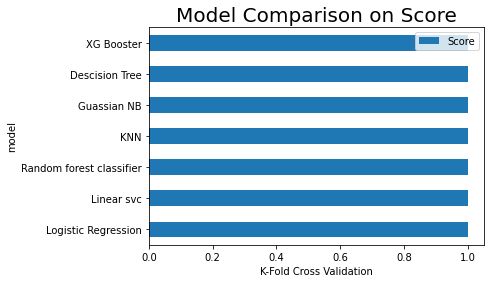

In [24]:
model_comparison = pd.DataFrame({'model':['Logistic Regression','Linear svc','Random forest classifier','KNN','Guassian NB','Descision Tree','XG Booster'],'Score':score})

# horizontal bar  chart
model_comparison.sort_values('Score',ascending=True).plot(x = 'model', y = 'Score', kind = 'barh')
plt.xlabel('K-Fold Cross Validation')
plt.title('Model Comparison on Score', size = 20);
plt.show()


In [25]:
# Model selected:random forest

# Model Optimization by hyper-parameter tuning

In [26]:
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
max_depth.append(None)
bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(r_grid)
rfr = RandomForestClassifier(random_state = 1)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [28]:
# Fit on the traing model
from sklearn.model_selection import RandomizedSearchCV
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.1s finished


In [29]:
print(rfr_random.best_params_)

{'n_estimators': 9, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [30]:
print(rfr_random.score(X_test , y_test))

-0.0


In [31]:
random_forest = RandomForestClassifier(n_estimators= 15, max_features= 'auto', max_depth=10, bootstrap= False)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
print(cm)
print(accuracy_score(y_test,Y_pred))

[[1717    0]
 [   0  309]]
1.0


In [33]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1717
         1.0       1.00      1.00      1.00       309

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

